In [2]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np
%config InlineBackend.figure_formats = ['svg']

# MPL
import matplotlib
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.patches import Patch
plt.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['legend.title_fontsize'] = 12
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['figure.dpi'] = 250
matplotlib.rcParams['figure.figsize'] = (5,5)

#colors
cmap = plt.get_cmap("viridis")
colors_b = sns.color_palette("colorblind")
colors_s = sns.color_palette("Set2")
viridis = cm.get_cmap('flare', 7)
colors = [viridis(i) for i in range(7)]
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

/var/folders/cm/wyr4f7dd46340qyn2n3sgyzm0000gn/T/ipykernel_97663/2452323821.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('flare', 7)


### Importing Data

In [3]:
file = 'Adam_160M_SP_SL2048_2Btok_BS512'
res1 = pd.read_pickle('../data/'+file+'.pkl')
res1

optim  num_steps   bs      lr   wd  beta1    beta2      ppl_train  \
173  adamw       2400  512  0.0005  0.1  0.975  0.97500   3.038235e+01   
172  adamw       2400  512  0.0005  0.1  0.975  0.95000   2.825297e+01   
171  adamw       2400  512  0.0005  0.1  0.975  0.99375   2.932573e+01   
187  adamw       2400  512  0.0005  0.1  0.950  0.95000   2.850600e+01   
174  adamw       2400  512  0.0005  0.1  0.975  0.90000   3.126639e+01   
..     ...        ...  ...     ...  ...    ...      ...            ...   
184  adamw       2400  512  0.0160  0.1  0.950  0.80000  7.599804e+269   
154  adamw       2400  512  0.0160  0.1  0.975  0.95000   2.201161e+03   
153  adamw       2400  512  0.0160  0.1  0.975  0.90000   2.462169e+03   
152  adamw       2400  512  0.0160  0.1  0.975  0.99375   2.119201e+03   
175  adamw       2400  512  0.0160  0.1  0.950  0.95000   2.463610e+03   

                                               ppl_all      ppl_test  
173  [16780.711521632908, 16523.166277826644, 17449...     29.922579  
172  [38206.69309702841, 38888.089427513536, 35427....     30.122867  
171  [57924.24347297243, 56086.446528702494, 21091....     30.131686  
187  [58502.890143221, 31000.91748959214, 28298.028...     29.407223  
174  [49792.585980576856, 25720.867518155595, 20030...     30.664566  
..                                                 ...           ...  
184  [58346.37816964917, 58128.77395446451, 20981.7...  57971.970823  
154  [16097.611126374248, 3288.997635036104, 2941.8...   2165.950922  
153  [16232.90458610987, 3382.6841124011116, 2640.8...   2304.333169  
152  [21594.338706603317, 7588.738003619992, 3639.9...   1991.084193  
175  [57924.74064287572, 57113.456232026474, 17925....   2451.605882  

[150 rows x 10 columns]

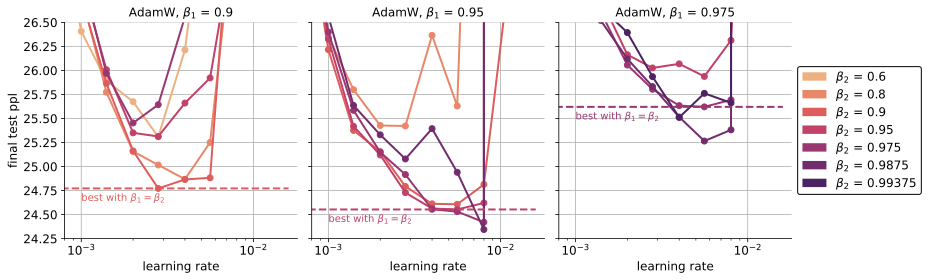

In [4]:
beta1s_n = [0.9, 0.95, 0.975]
beta2s_n = [0.6, 0.8, 0.9, 0.95, 0.975, 0.9875, 0.99375] # 8 colors

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(13, 4), sharey=True)
res_betas = np.zeros((len(beta1s_n), len(beta2s_n) ))
for i, beta1 in enumerate(beta1s_n):
    ax = axes[i]
    beta2s_loc = np.round(1 - np.array([4,2,1,0.5,0.25])*(1-beta1),5)
    index_first = beta2s_n.index(beta2s_loc[0])
    for j, beta2 in enumerate(beta2s_loc):
        lrs_plt = np.array(res1[(res1['beta1'] == beta1) & (res1['beta2'] == beta2)]['lr'])
        data = np.array(res1[(res1['beta1'] == beta1) & (res1['beta2'] == beta2)]['ppl_test'])
        #res_betas[i,j] = np.min(data)
        if beta1==beta2:
            res_best_beta12 = np.min(data)
            idx_best = j
        ax.plot(lrs_plt, data, marker='o', label=r'$\beta_2$ = '+str(beta2), color = colors[index_first+j])
    ax.plot(lrs_plt, 0*lrs_plt+res_best_beta12,'--',color = colors[index_first+idx_best])
    ax.text(lrs_plt[1], res_best_beta12 - 0.05, r"best with $\beta_1 = \beta_2$", 
        color=colors[index_first+idx_best], fontsize=10, verticalalignment='top')
    ax.set_xscale('log')
    ax.set_ylim([24.25, 26.5])
    #ax.set_ylim([22.6, 24.0])
    ax.set_xlim([0.8e-3, 0.018])
    ax.grid()
    if beta1==beta1s_n[-1]:
        legend_elements = [Patch(facecolor=colors[ii], label=r'$\beta_2$ = '+str(beta2s_n[ii]))for ii in range(len(beta2s_n))]
        ax.legend(handles=legend_elements, framealpha=1, facecolor='white', edgecolor='black',loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(r'AdamW, $\beta_1$ = '+str(beta1))
    #ax.set_xticks(lrs)
    #ax.set_xticklabels([f"{num:.1e}" for num in lrs])
    ax.set_xlabel('learning rate')
    if i == 0:
        ax.set_ylabel('final test ppl')

plt.tight_layout()
#plt.savefig('sm3.pdf', format="pdf", bbox_inches="tight")
#plt.savefig('betas_big_exp_small_bs.pdf', format="pdf", bbox_inches="tight")
